# Customer Loan Default Prediction & Expected Loss Calculation

#### Import Packages and Load Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Supress warnings
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
df = pd.read_csv('Loan_Data.csv')
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


`fico_score` <br>
A **FICO Score** is a three-digit number based on the information in your credit reports. It helps lenders determine how likely you are to repay a loan. This, in turn, affects how much you can borrow, how many months you have to repay, and how much it will cost (the interest rate).

## Understanding Data

In [4]:
df.shape

(10000, 8)

In [5]:
df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


**Checking for NULL values**

In [7]:
df.isna().sum()

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

The dataset has no values.

#### Data Distributions

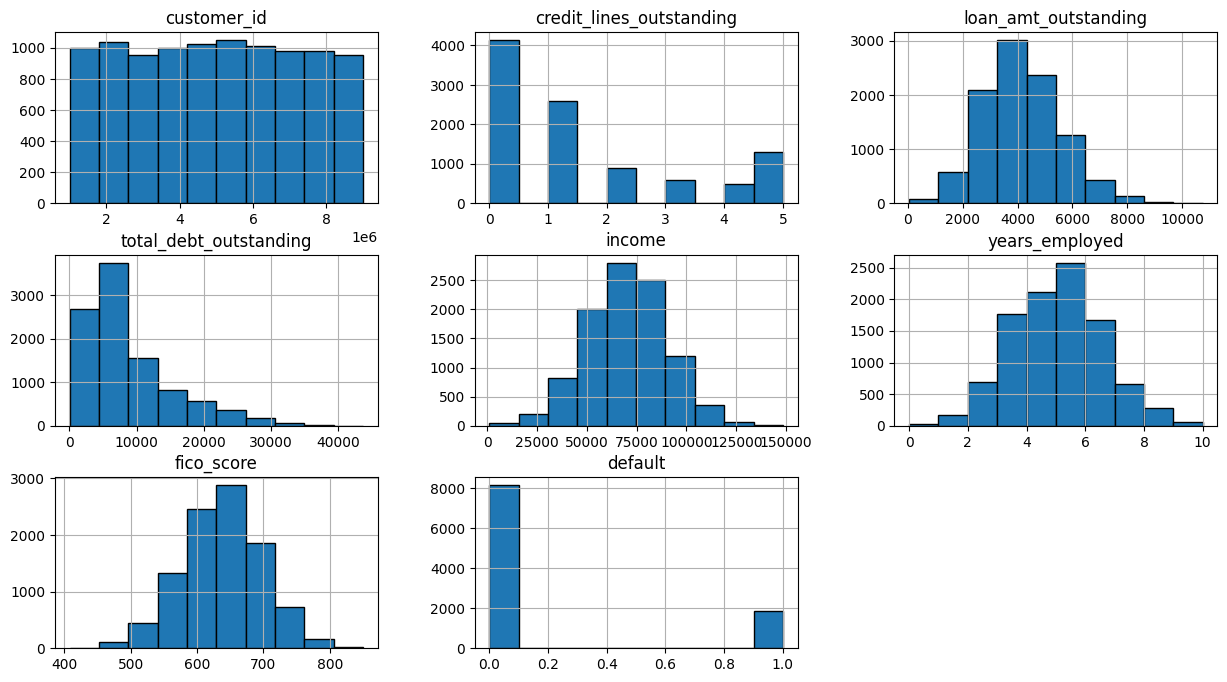

In [8]:
df.hist(figsize = (15,8), edgecolor = "black")
plt.show()

In [9]:
df.columns

Index(['customer_id', 'credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score',
       'default'],
      dtype='object')

#### Outlier Detection using Z-Score

Z-score is also called standard score. This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean. <br>

$$z = \frac{x - \mu}{\sigma}$$


It is estimated that 
 - 68% of the data points lie between +/- 1 standard deviation
 - 95% of the data points lie between +/- 2 standard deviation
 - 99.7% of the data points lie between +/- 3 standard deviation

**Outlier Detection** <br>

 - If the z score of a data point is more than 3, it indicates that the data point is quite different from the other data points.
 - Such a data point can be an outlier.


In [10]:
features = ['credit_lines_outstanding', 'loan_amt_outstanding',
       'total_debt_outstanding', 'income', 'years_employed', 'fico_score']
for i in features:
    mean = df[[i]].mean()
    sd = df[[i]].std()
    z_score = (df[[i]] - mean)/sd
    df2 = df[[i]][abs(z_score) > 3]
    print("""
    {0}
    -----------------------------------------------
    Mean:     {1}
    S.D.:     {2}
    Outliers: {3}
    """.format(i,mean[0], sd[0], df2.count()[0]))


    credit_lines_outstanding
    -----------------------------------------------
    Mean:     1.4612
    S.D.:     1.7438459392578196
    Outliers: 0
    

    loan_amt_outstanding
    -----------------------------------------------
    Mean:     4159.677034265904
    S.D.:     1421.3990776378926
    Outliers: 41
    

    total_debt_outstanding
    -----------------------------------------------
    Mean:     8718.916796726344
    S.D.:     6627.164761596831
    Outliers: 143
    

    income
    -----------------------------------------------
    Mean:     70039.90140134419
    S.D.:     20072.214143165438
    Outliers: 30
    

    years_employed
    -----------------------------------------------
    Mean:     4.5528
    S.D.:     1.5668623633767507
    Outliers: 11
    

    fico_score
    -----------------------------------------------
    Mean:     637.5577
    S.D.:     60.657906400327455
    Outliers: 26
    


### Scaling Data

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
standard = StandardScaler()
df_scaled = standard.fit_transform(df[features])
df_scaled = pd.DataFrame(df_scaled, columns = features)
df_scaled.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
0,-0.837960,0.747096,-0.724848,0.398555,0.285425,-0.536770
1,2.029409,-1.548375,-0.073967,-2.161876,-1.629325,-1.080832
2,-0.837960,-0.560509,-1.009696,-0.207919,-0.352825,-0.586230
3,-0.837960,0.427045,-0.938184,0.215083,0.285425,-0.421363
4,-0.264486,-1.979733,-1.048780,-2.321314,0.923675,-0.108115


#### Plotting Scaled Data

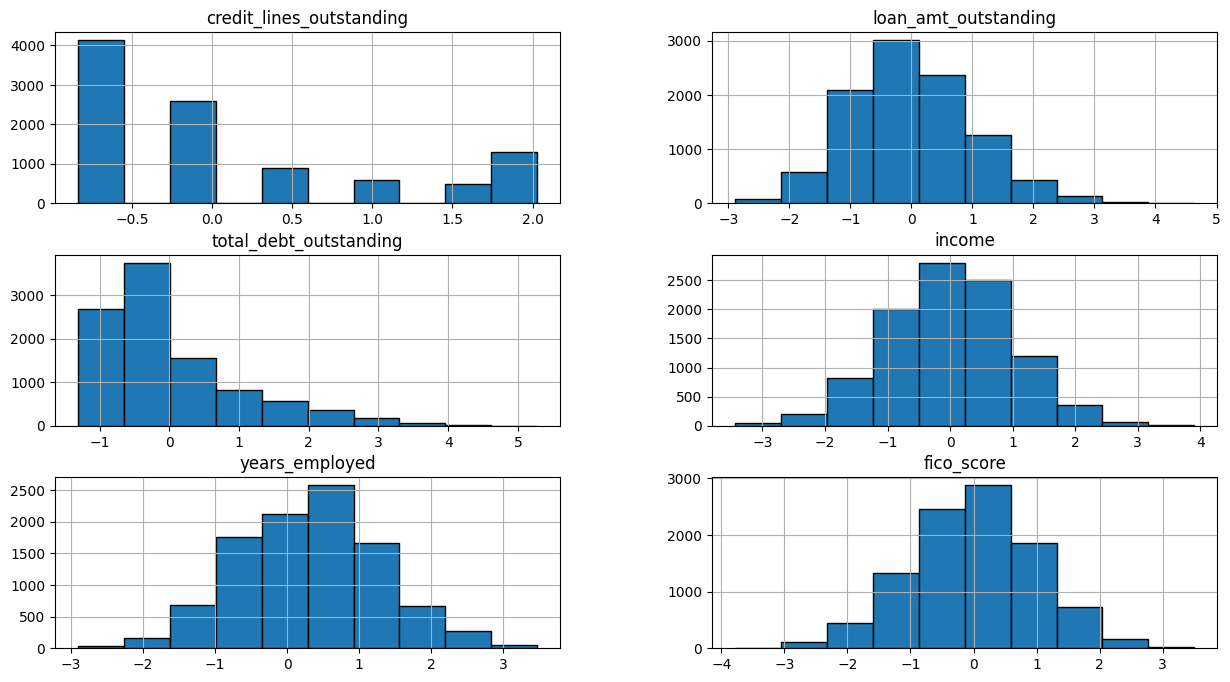

In [13]:
df_scaled.hist(figsize = (15,8), edgecolor = "black")
plt.show()

### Skewness

In [14]:
import scipy.stats as stats

In [15]:
old_skew = df_scaled.skew().sort_values(ascending=False)
old_skew

total_debt_outstanding      1.414046
credit_lines_outstanding    1.029719
loan_amt_outstanding        0.421500
years_employed              0.079835
income                     -0.011704
fico_score                 -0.080742
dtype: float64

The data is not normal and a lot of the columns are highly skewed. <br>
To rectify this, we will use a Quantile Transformer to normalize the data.

In [16]:
from sklearn.preprocessing import QuantileTransformer

In [17]:
q_transformer = QuantileTransformer()
df_transform = q_transformer.fit_transform(df_scaled)
df_transform = pd.DataFrame(df_transform, columns = df_scaled.columns)
df_transform.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
0,0.000000,0.781766,0.223118,0.656350,0.604605,0.290791
1,1.000000,0.044579,0.609824,0.016903,0.054054,0.138639
2,0.000000,0.304206,0.085111,0.416819,0.370370,0.274775
3,0.000000,0.687683,0.112064,0.579888,0.604605,0.330330
4,0.542543,0.012996,0.072076,0.011498,0.817317,0.450951


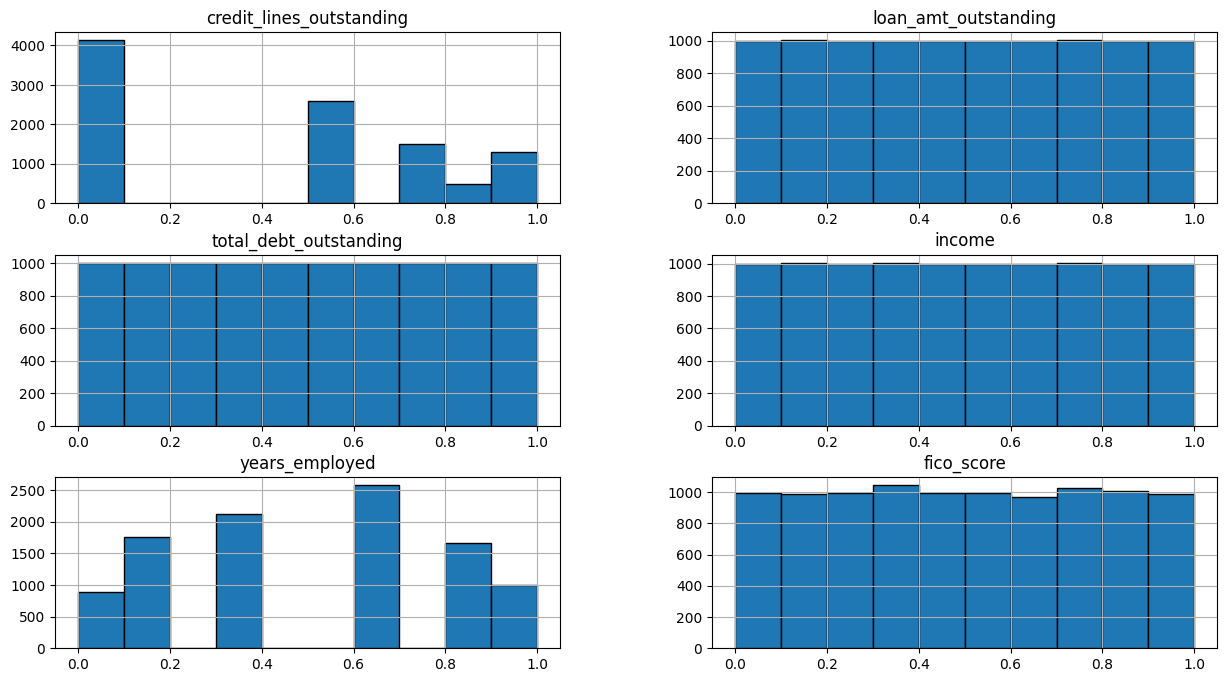

In [18]:
df_transform.hist(figsize = (15,8), edgecolor = "black")
plt.show()

In [19]:
new_skew = df_transform.skew().sort_values(ascending=False)
new_skew

credit_lines_outstanding    0.053313
income                      0.000030
total_debt_outstanding      0.000005
loan_amt_outstanding        0.000004
fico_score                 -0.000025
years_employed             -0.001482
dtype: float64

Now we can see that the data has become highly normalized.

### Splitting Data

In [20]:
X = df_transform
y = df["default"]

**Training and Testing Sets**

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [23]:
X_train.shape

(7000, 6)

In [24]:
y_train.shape

(7000,)

In [25]:
X_test.shape

(3000, 6)

In [26]:
y_test.shape

(3000,)

In [27]:
y_train.value_counts()

default
0    5695
1    1305
Name: count, dtype: int64

In [28]:
y_test.value_counts()

default
0    2454
1     546
Name: count, dtype: int64

### Prediction Model

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
rfc = RandomForestClassifier(n_estimators = 1000)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [31]:
classify = rfc.predict(X_test)

In [32]:
pd.Series(classify).value_counts()

0    2451
1     549
Name: count, dtype: int64

#### Model Evaluation

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [34]:
print("""
    ============================================
    ERROR METRICS
    ============================================
    Accuracy Score:     {}
    Precision Score:    {}
    Recall Score:       {}
    f1-Score:           {}
""".format(accuracy_score(y_test, classify), precision_score(y_test, classify), recall_score(y_test, classify), f1_score(y_test, classify)))


    ERROR METRICS
    Accuracy Score:     0.9923333333333333
    Precision Score:    0.97632058287796
    Recall Score:       0.9816849816849816
    f1-Score:           0.9789954337899544



**Confusion Matrix**

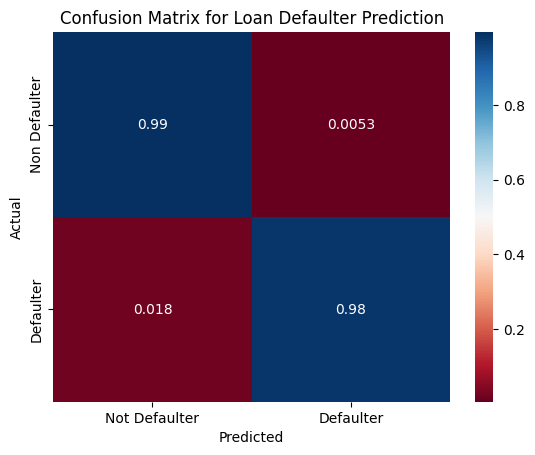

In [35]:
matrix = confusion_matrix(y_test, classify)
matrix = matrix.astype('float')/matrix.sum(axis = 1)[:, np.newaxis]
sns.heatmap(matrix, annot = True, xticklabels = ["Not Defaulter", "Defaulter"], yticklabels = ["Non Defaulter", "Defaulter"], cmap = "RdBu")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Loan Defaulter Prediction")
plt.show()

It can be seen that the model is **highly efficient and accurate** in predicting borrowers that will default.

### Expected Loss Calculation

The function below, `expected_loss_estimate`, takes in the prediction model as the input, along with the data for which the probability of default, as well as, the expected loss must be calculated, , the recovery rate, and also the original dataset before transformation. It returns the expected loss for each loan as result.

$$EL = PD × LGD × EAD = PD × (1 − RR) × EAD$$
where :
 - PD = probability of default
 - LGD = loss given default
 - EAD = exposure at default
 - RR = recovery rate (RR = 1 − LGD).

In [36]:
def expected_loss_estimate(rfc, X_test, df, recovery_rate = 0.1):
    """
    rfc = Prediction Model Object
    X_test = Loan Data to be estimated
    df = Original Data
    recovery_rate = Recovery Rate given, default = 10% (0.1)

    Returns the expected loss
    """
    prob_default = pd.DataFrame(rfc.predict_proba(X_test), index = X_test.index)[0]
    exposure_at_def = df.loc[X_test.index]['total_debt_outstanding']

    estimated_loss = exposure_at_def*prob_default*(1 - recovery_rate)
    return pd.DataFrame({
        "probability_of_default" : prob_default,
        "expected_loss" : estimated_loss
    }, index = X_test.index)
    

In [37]:
df_loss = expected_loss_estimate(rfc, X_test, df, 0.1)
df_loss.head()

,probability_of_default,expected_loss
9394,1.000,8213.450026
898,1.000,6298.455542
2398,0.002,32.534602
5906,1.000,2198.848748
2343,0.999,608.017918
